In [1]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [3]:
train_data=r"C:\Users\asus\Downloads\Deeplearningdataset\archive (4)\Training"

In [4]:
X = []
Y = []

for i in os.listdir(train_data):
    folder_path = os.path.join(train_data, i)
    
    if os.path.isdir(folder_path):
        for image in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image)
            
            if image_path.lower().endswith((".png", ".jpg", ".jpeg")):
                
                img = cv2.imread(image_path)
                
                if img is not None:
                    img = cv2.resize(img, (128, 128))
                    img = img / 255.0
                    
                    X.append(img)
                    Y.append(i)

X = np.array(X)
Y = np.array(Y)
print(X.shape)
print(Y.shape)


(5712, 128, 128, 3)
(5712,)


In [5]:
le = LabelEncoder()
Y_encoded = le.fit_transform(Y)

Y_categorical = to_categorical(Y_encoded)

print(Y_categorical.shape)


(5712, 4)


In [6]:
Y_categorical

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y_categorical, test_size=0.2, random_state=42
)


In [8]:
print(len(X_train),len(Y_train))
print(len(X_test),len(Y_test))

4569 4569
1143 1143


In [9]:
model = Sequential()

# First Convolution Layer
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPool2D(pool_size=(2,2)))

# Second Convolution Layer
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Third Convolution Layer
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Flatten Layer
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(4, activation='softmax'))

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [11]:
model.fit(X_train,Y_train,batch_size=16,epochs=20,validation_data=(X_test,Y_test))



Epoch 1/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 57s 177ms/step - accuracy: 0.6774 - loss: 0.7839 - val_accuracy: 0.8206 - val_loss: 0.4658
Epoch 2/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 47s 165ms/step - accuracy: 0.8306 - loss: 0.4421 - val_accuracy: 0.8793 - val_loss: 0.3189
Epoch 3/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 48s 169ms/step - accuracy: 0.8720 - loss: 0.3409 - val_accuracy: 0.8863 - val_loss: 0.2772
Epoch 4/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 186s 652ms/step - accuracy: 0.9092 - loss: 0.2541 - val_accuracy: 0.9186 - val_loss: 0.2179
Epoch 5/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 49s 172ms/step - accuracy: 0.9302 - loss: 0.2055 - val_accuracy: 0.9274 - val_loss: 0.1905
Epoch 6/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 49s 170ms/step - accuracy: 0.9424 - loss: 0.1656 - val_accuracy: 0.9370 - val_loss: 0.2059
Epoch 7/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 48s 168ms/step - accuracy: 0.9564 - loss: 0.1261 - val_accuracy: 0.9335 - val_loss: 0.2087
Epoch 8/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 49s 172ms/step - accuracy: 0.9580 - loss: 

In [12]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("Validation Accuracy:", accuracy)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9440 - loss: 0.3024
Validation Accuracy: 0.9440069794654846


In [13]:
test_data=r"C:\Users\asus\Downloads\Deeplearningdataset\archive (4)\Testing\pituitary\Te-pi_0287.jpg"

In [ ]:


# 2️⃣ Read image
img = cv2.imread(test_data)

# 3️⃣ Resize (same as training)
img = cv2.resize(img, (128, 128))

# 4️⃣ Normalize (same as training)
img = img / 255.0

# 5️⃣ Add batch dimension 
img = np.expand_dims(img, axis=0)

print("Input shape:", img.shape)   




Input shape: (1, 128, 128, 3)


In [15]:
prediction = model.predict(img)
prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


array([[1.8198812e-13, 1.8022567e-10, 9.4474714e-14, 1.0000000e+00]],
      dtype=float32)

In [16]:
# 7️⃣ Get class index
pred_class = np.argmax(prediction)

# 8️⃣ Convert to class name
predicted_label = le.inverse_transform([pred_class])[0]

print("Predicted Tumor Type:", predicted_label)


Predicted Tumor Type: pituitary


In [17]:
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_test, axis=1)

cm = confusion_matrix(Y_true, Y_pred_classes)
print(cm)

print(classification_report(Y_true, Y_pred_classes))


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step
[[264  23   0   1]
 [ 12 228  13  12]
 [  0   1 290   0]
 [  0   2   0 297]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       288
           1       0.90      0.86      0.88       265
           2       0.96      1.00      0.98       291
           3       0.96      0.99      0.98       299

    accuracy                           0.94      1143
   macro avg       0.94      0.94      0.94      1143
weighted avg       0.94      0.94      0.94      1143



<Axes: >

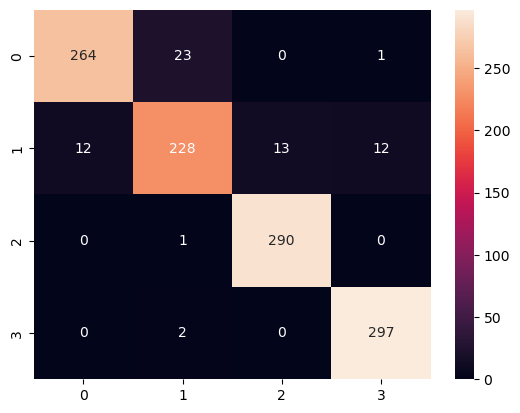

In [20]:
sns.heatmap(cm,fmt="d",annot=True)

In [21]:
model.save("brain_tumor_cnn_model.h5")


In [22]:
model.input_shape


(None, 128, 128, 3)